<a href="https://colab.research.google.com/github/CDFire/ProjectsInAI-ML/blob/main/HW5/ProjectsInAIML_HW5_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I chose the Oxford 102 Flower Dataset for this project. This dataset contains 102 flower categories with different poses and backgrounds making it a challenging yet interesting classification problem.

Link:
https://www.kaggle.com/datasets/nunenuh/pytorch-challange-flower-dataset/data

#Part 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os
import shutil
import random
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications import VGG16

In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/48/image_04685.jpg  
  inflating: dataset/train/48/image_04686.jpg  
  inflating: dataset/train/48/image_04689.jpg  
  inflating: dataset/train/48/image_04692.jpg  
  inflating: dataset/train/48/image_04694.jpg  
  inflating: dataset/train/48/image_04695.jpg  
  inflating: dataset/train/49/image_06198.jpg  
  inflating: dataset/train/49/image_06199.jpg  
  inflating: dataset/train/49/image_06200.jpg  
  inflating: dataset/train/49/image_06201.jpg  
  inflating: dataset/train/49/image_06203.jpg  
  inflating: dataset/train/49/image_06204.jpg  
  inflating: dataset/train/49/image_06205.jpg  
  inflating: dataset/train/49/image_06206.jpg  
  inflating: dataset/train/49/image_06207.jpg  
  inflating: dataset/train/49/image_06208.jpg  
  inflating: dataset/train/49/image_06211.jpg  
  inflating: dataset/train/49/image_06212.jpg  
  inflating: dataset/train/49/image_06214.jpg  
  inflating: dataset/train/49/image_0

In [ ]:
mixed_precision.set_global_policy('mixed_float16')

In [ ]:
train_dir = '/content/dataset/train'
validation_dir = '/content/dataset/valid'

In [ ]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

test_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5283 images belonging to 102 classes.
Found 1269 images belonging to 102 classes.
Found 818 images belonging to 102 classes.


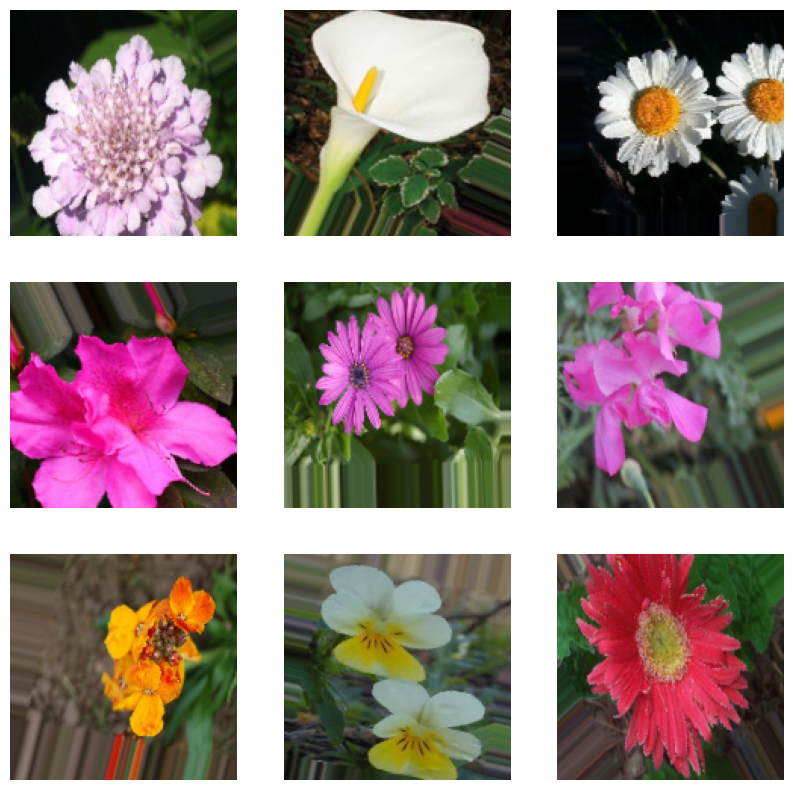

In [ ]:
x_batch, y_batch = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.show()

In [ ]:
# custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(102, activation='softmax')  # 102 classes for flowers
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# train the model
trained_model = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 63s 294ms/step - accuracy: 0.0504 - loss: 5.2164 - val_accuracy: 0.0134 - val_loss: 8.4697
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 42s 251ms/step - accuracy: 0.1267 - loss: 3.9855 - val_accuracy: 0.0318 - val_loss: 5.7899
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.1998 - loss: 3.4853 - val_accuracy: 0.1797 - val_loss: 3.6489
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - accuracy: 0.2488 - loss: 3.0971 - val_accuracy: 0.2677 - val_loss: 2.9627
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.2699 - loss: 2.9305 - val_accuracy: 0.3007 - val_loss: 2.9102
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 247ms/step - accuracy: 0.3045 - loss: 2.7499 - val_accuracy: 0.2628 - val_loss: 3.6219
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 238ms/step - accuracy: 0.3466 - loss: 2.5403 - val_accuracy: 0.3680 - val_loss: 2.6521
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 234ms/step - accuracy: 0.3477 - loss: 2

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.4873 - loss: 2.3850
Test Accuracy: 0.4925137758255005
Test Loss: 2.3696651458740234


Final Test Evaluation: Test Loss: ~2.37 Test Accuracy: ~49.25%

The final evaluation was performed on a held‐out test set. Although the training reached as high as ~73% accuracy in later epochs, the test evaluation shows that the model correctly classified about half of the images.

Metrics Description

Loss - Categorical Crossentropy: measures the difference between the predicted probability distribution and the true distribution. A lower loss value indicates that the model’s predictions are closer to the true labels. The reported test loss of ~2.37 suggests there is still a considerable gap between the predicted probabilities and the actual classes.

Accuracy: the proportion of samples for which the predicted class matches the true class. In this context, an accuracy of ~49.25% means that roughly half of the test images were correctly classified into one of the 102 flower categories.

#Part 2

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
model_vgg = Sequential([
    base_model,
    Flatten(),  # Optionally, use GlobalAveragePooling2D()
    Dense(512, activation='relu'),
    Dense(102, activation='softmax')  # 102 classes for the flowers
])

model_vgg.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Train the VGG16-based model using the same training and test generators
trained_vgg = model_vgg.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

Epoch 1/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 65s 341ms/step - accuracy: 0.0941 - loss: 4.5383 - val_accuracy: 0.3515 - val_loss: 2.6918
Epoch 2/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 288ms/step - accuracy: 0.4322 - loss: 2.2594 - val_accuracy: 0.4854 - val_loss: 1.9920
Epoch 3/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.5603 - loss: 1.6621 - val_accuracy: 0.5154 - val_loss: 1.8955
Epoch 4/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 290ms/step - accuracy: 0.6298 - loss: 1.3787 - val_accuracy: 0.5737 - val_loss: 1.6257
Epoch 5/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 289ms/step - accuracy: 0.6800 - loss: 1.1963 - val_accuracy: 0.5800 - val_loss: 1.6081
Epoch 6/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 287ms/step - accuracy: 0.7109 - loss: 1.0639 - val_accuracy: 0.6178 - val_loss: 1.4365
Epoch 7/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 47s 286ms/step - accuracy: 0.7279 - loss: 0.9899 - val_accuracy: 0.6186 - val_loss: 1.4429
Epoch 8/50
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 288ms/step - accuracy: 0.7409 - loss: 0

In [ ]:
test_loss_vgg, test_acc_vgg = model_vgg.evaluate(test_generator)
print("VGG16 Transfer Learning Test Accuracy:", test_acc_vgg)
print("VGG16 Transfer Learning Test Loss:", test_loss_vgg)

40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 216ms/step - accuracy: 0.7096 - loss: 1.3354
VGG16 Transfer Learning Test Accuracy: 0.6997635960578918
VGG16 Transfer Learning Test Loss: 1.3913203477859497


Custom CNN:

	•	Final Test Accuracy: ~49%
	•	Final Test Loss: ~2.37
	•	The training history shows fluctuations in validation metrics.
	•	Although the training accuracy reached over 70% in some epochs, the generalization to unseen test data was limited.

VGG16:

	•	Final Test Accuracy: ~70%
	•	Final Test Loss: ~1.39
	•	The VGG16 model reaches higher accuracy much faster and maintains a more stable validation performance.
	•	The lower loss indicates that the predicted probabilities are closer to the true labels.

VGG16 leverages weights pre-trained on large datasets (like ImageNet), meaning it starts with robust feature extractors that capture universal visual patterns. This gives it a head start when fine-tunining for the flower classification task. The custom CNN on the other hand is trained from scratch; therefore, it has to learn all the features from the limited dataset, which can be challenging and often results in less robust generalization.

In addition, VGG16 is a much deeper architecture with more layers dedicated to feature extraction. This allows it to capture more complex and abstract patterns in images. The custom CNN has fewer layers and may not have sufficient capacity to capture all the nuances needed for accurate classification of 102 flower classes.

#Part 3

I already included data augmentation in my part 1 because, it did really poorly on the initial dataset without augmentation. I did not realize that part 3 requested this, but I can speak to the effects. Augmentation did not really affect how well the CNN did on the validation set during training. On the other hand, before augmentation, test accuracy was at ~40% so adding data augmentation significantly improved the generalization of the CNN. This is because, by exposing the model to a wider variety of image conditions during training, it enhaces diversity, reducces overfitting and therefore leads to better generalization. By applying random transformations, the model sees many variations of the same image. This forces it to learn more robust features that capture the underlying characteristics of each class rather than memorizing specific details. In addition, augmentation increases the effective size of the dataset, helping the model avoid overfitting and improving its performance on the test set. The significant jump in test accuracy indicates that the model learned to be invariant to the transformations. Essentially, it became better at recognizing the flowers under different conditions.